use iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

1.Measure prediction score using default n_estimators (10)

2.Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# create dataframe for the data
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# add target to dataframe
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
# create training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["target"], axis= "columns"), df.target, test_size= 0.2)

In [17]:
len(X_test)

30

In [18]:
len(X_train)

120

Measure prediction score using default n_estimators (10)


In [22]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model1

RandomForestClassifier()

In [23]:
model1.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
model1.score(X_test, y_test)

0.9666666666666667

In [27]:
# confusion matrix
y_predicted = model1.predict(X_test)
print("predicted: \n", y_predicted)

print("Confusion matrix....")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

predicted: 
 [1 1 2 2 2 2 0 1 2 0 1 1 2 2 2 0 2 1 2 1 0 0 1 2 2 2 0 0 0 1]
Confusion matrix....


array([[ 8,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 13]], dtype=int64)

Text(69.0, 0.5, 'Truth')

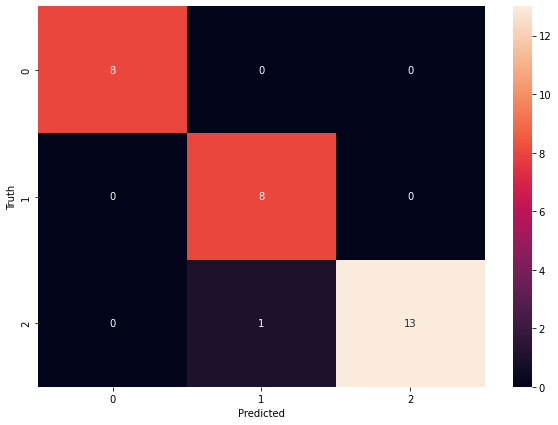

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# hyperparameter tuning
Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [30]:
print("using n_estimators = 10")
model2 = RandomForestClassifier(n_estimators= 10)
print("model2:",model2)

model2.fit(X_train, y_train)
print("Model2 accuracy:", model2.score(X_test, y_test))


using n_estimators = 10
model2: RandomForestClassifier(n_estimators=10)
Model2 accuracy: 0.9666666666666667


In [31]:
print("using n_estimators = 40")
model3 = RandomForestClassifier(n_estimators= 40)
print("model2:",model3)

model3.fit(X_train, y_train)
print("Model2 accuracy:", model3.score(X_test, y_test))


using n_estimators = 40
model2: RandomForestClassifier(n_estimators=40)
Model2 accuracy: 0.9666666666666667
